### KNN Model

Este conjunto de datos se originó en el Instituto Nacional de Diabetes y Enfermedades Digestivas y del Riñón. Su principal objetivo es realizar un diagnóstico predictivo con fines médicos para determinar si un paciente padece diabetes, utilizando ciertas mediciones diagnósticas que se encuentran registradas en el conjunto de datos. Se aplicaron diversas restricciones en la selección de estas instancias a partir de una base de datos más amplia. Es importante destacar que todos los pacientes incluidos en este conjunto de datos son mujeres mayores de 21 años de ascendencia india Pima.

El archivo en formato CSV contiene varias variables, algunas de las cuales son independientes (varias variables predictoras médicas) y solo una variable dependiente objetivo (Resultado).


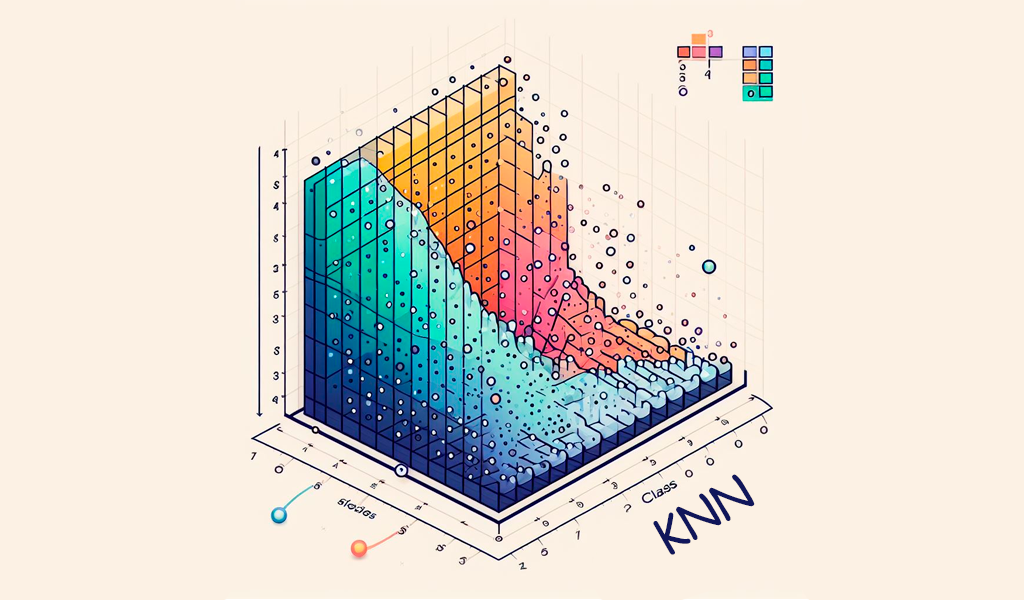

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split


In [56]:
df=pd.read_csv("../dataset/diabetes.csv",encoding="ISO-8859-1",delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pasamos lo nombres de las columnas a minsuculas

In [57]:
df.columns = [col.lower() for col in df.columns]

Creamos un diagrama de dispersión de pares para cada variable numérica en el conjunto de datos.

Los puntos se colorean según el valor de la variable outcome.

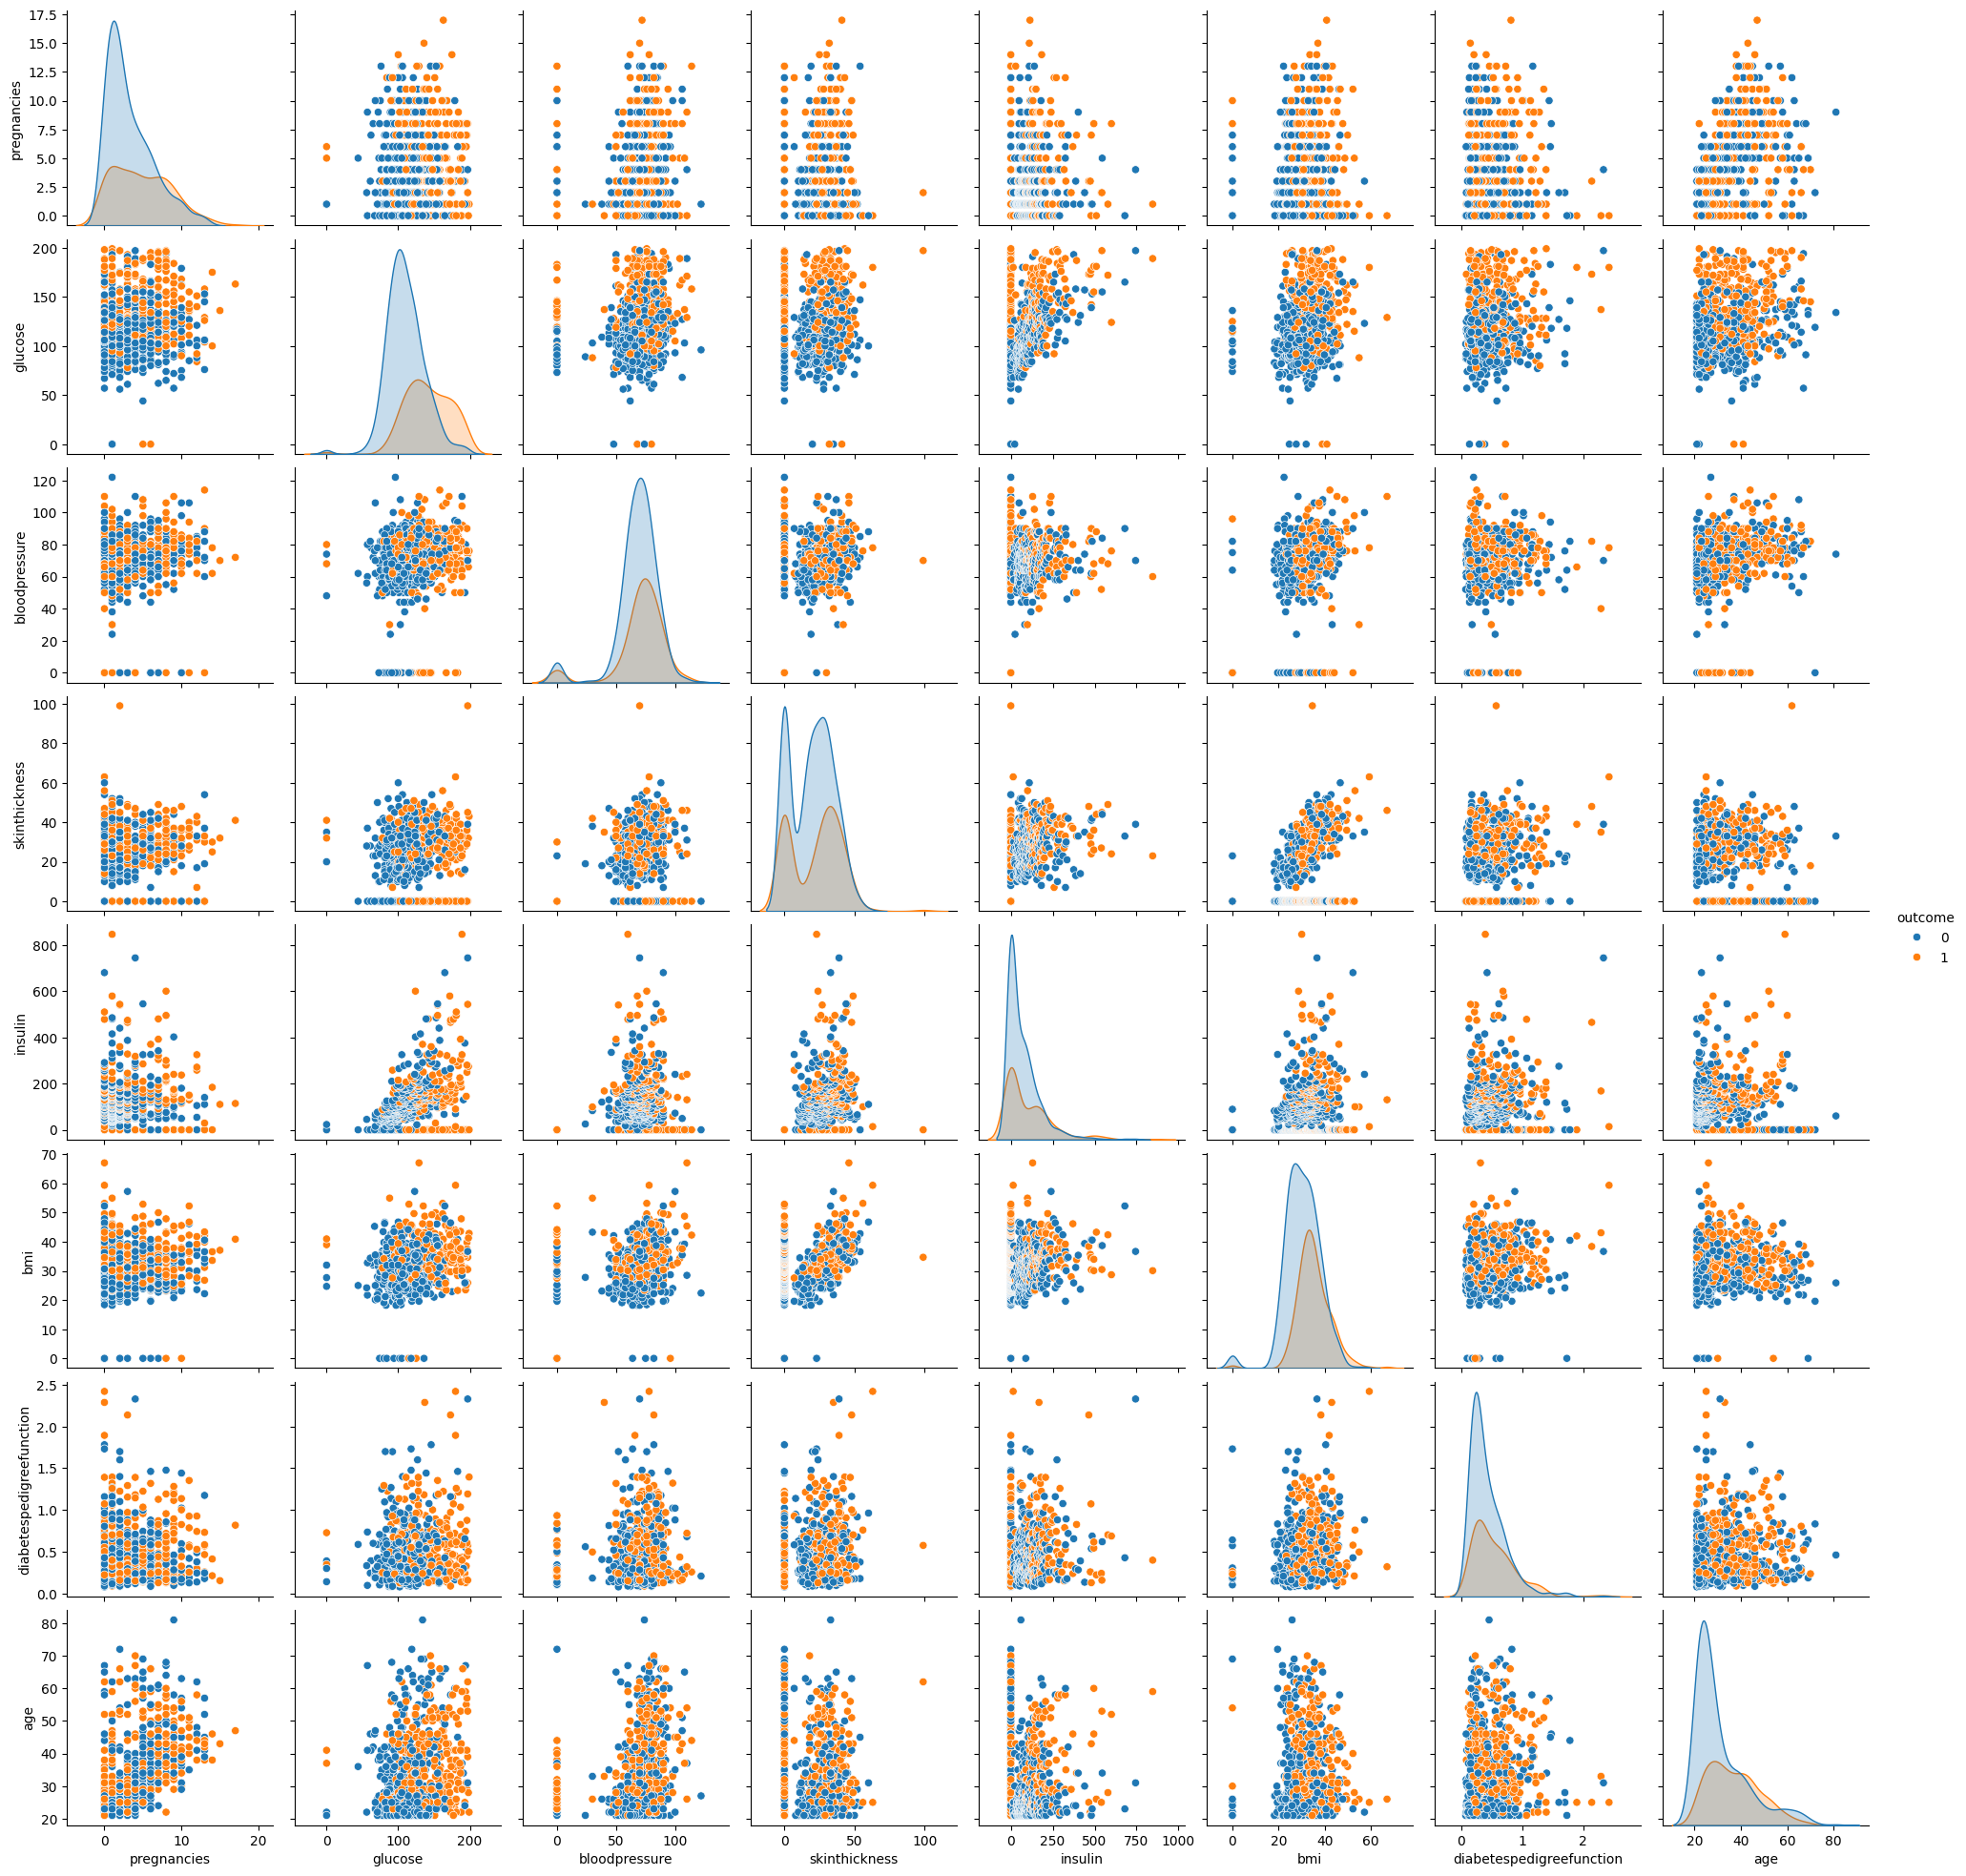

In [55]:
sns.pairplot(df, hue='outcome')

In [41]:
df["outcome"].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

A continuacion dividimos el conjunto de datos en dos subconjuntos: un conjunto de entrenamiento y un conjunto de prueba. 
El conjunto de entrenamiento se utiliza para entrenar un modelo de aprendizaje automático, mientras que el conjunto de prueba se utiliza para evaluar el rendimiento del modelo.

El parámetro test_size especifica la proporción de datos que se asignará al conjunto de prueba. En este caso, el 20% de los datos se asignará al conjunto de prueba y el 80% restante se asignará al conjunto de entrenamiento.

In [42]:
y = df["outcome"]
X = df.drop(["outcome"], axis=1)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
X.shape, y.shape

((768, 8), (768,))

A continuacion entrenamo el modelo de K-Vecinos Cercanos (KNN) y luego lo evaluamos en un conjunto de prueba.

In [44]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Accuracy_score calcula la puntuación de precisión del modelo KNN. 
La puntuación de precisión es una medida de qué tan bien el modelo predijo las etiquetas de los datos de prueba.

In [45]:
accuracy_score(y_test, y_pred)

0.7207792207792207

A continuacion creamos un modelo de clasificación KNN (K Neighbors Classifier) para predecir la variable "Outcome" en función de las variables restantes del DataFrame.

In [66]:
X_train = df.drop('outcome', axis=1)
y_train = df['outcome']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Creamos un nuevo pasciente ficticio con sus valores e intentamos predecir:

In [71]:
paciente = np.array([ 1, 180, 70, 22, 80, 30.0, 0.47, 23])
paciente = paciente.reshape(1, -1)
paciente

array([[  1.  , 180.  ,  70.  ,  22.  ,  80.  ,  30.  ,   0.47,  23.  ]])

In [70]:
prediction = knn.predict(paciente)
print(prediction)

[1]


c:\Users\KONOHA\Documents\WS\Data Science\Grupo2_PP1\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [73]:
nuevo_paciente = np.array([ 1, 110, 70, 22, 80, 30.0, 0.47, 23])
nuevo_paciente = nuevo_paciente.reshape(1, -1)
nuevo_paciente

array([[  1.  , 110.  ,  70.  ,  22.  ,  80.  ,  30.  ,   0.47,  23.  ]])

In [74]:
prediction = knn.predict(nuevo_paciente)
print(prediction)

[0]


c:\Users\KONOHA\Documents\WS\Data Science\Grupo2_PP1\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Aumentamos el tamaño de datos de prueba:

In [75]:
X = df.drop('outcome', axis=1)
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Crear un modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
# Evaluar el rendimiento del modelo
score = knn.score(X_test, y_test)*100
print(score)

71.35416666666666


Realizamos  validación cruzada para evaluar el rendimiento de un modelo

cross_val_score() divide el conjunto de datos de entrenamiento en 5 partes iguales, llamadas "folds", luego el modelo KNN se entrena en 4 de los folds y se evalúa en el fold restante. Este proceso se repite 5 veces, una para cada fold.

Los resultados de las 5 evaluaciones cruzadas se almacenan en la variable scores. 

Esta variable es una lista de 5 valores, cada uno de los cuales representa el rendimiento del modelo KNN en un fold.

In [60]:

scores = cross_val_score(knn, X, y, cv=5)
print(scores)

[0.76623377 0.75324675 0.74675325 0.2875817  0.40522876]
